3. Treine uma nova versão com as configurações propostas por Salakhutdinov1:
Activation: Tanh
Hidden: 500,500,500
Epochs: 20
Rate: 0.01
Rate_annealing: 0.001

In [2]:
import h2o
from h2o.estimators import H2ODeepLearningEstimator

# Iniciar o servidor H2O
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,2 hours 30 mins
H2O_cluster_timezone:,Europe/Lisbon
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,5 days
H2O_cluster_name:,Alice Dias
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.311 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


In [3]:
# Importar os ficheiros CSV (train e test)
train = h2o.import_file("dataset/mnist_train.csv")
test = h2o.import_file("dataset/mnist_test.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [4]:
# Preparar os dados
# A primeira coluna é a label (dígito de 0 a 9)
train[0] = train[0].asfactor()
test[0] = test[0].asfactor()

# Definir colunas de entrada (pixels) e saída (label)
x = train.columns[1:]  # Features: 784 pixels
y = train.columns[0]   # Target: dígito (0-9)

In [5]:
# Modelo com 3 camadas de 500 neurónios, Tanh, e taxa de aprendizagem controlada
model_salakhutdinov = H2ODeepLearningEstimator(
    activation="Tanh",
    hidden=[500, 500, 500],
    epochs=20,
    rate=0.01,
    rate_annealing=0.001,
    stopping_metric="misclassification",
    seed=1234
)

# Treinar o modelo
model_salakhutdinov.train(x=x, y=y, training_frame=train, validation_frame=test)

deeplearning Model Build progress: |

C:\Users\Alice Dias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: Dropping bad and constant columns: [27x28, 27x27, 4x28, 28x4, 28x3, 28x2, 26x28, 27x2, 27x1, 1x1, 25x2, 1x2, 25x1, 1x3, 3x1, 1x4, 3x2, 1x5, 5x1, 1x6, 21x1, 1x7, 7x1, 1x8, 1x9, 3x27, 3x28, 18x1, 25x28, 1x12, 2x25, 2x26, 2x27, 2x28, 1x17, 1x18, 1x19, 27x3, 1x10, 1x11, 28x28, 24x28, 28x1, 26x2, 26x1, 2x1, 24x2, 2x2, 24x1, 28x27, 2x3, 4x1, 28x26, 2x4, 4x2, 28x25, 6x1, 1x23, 6x2, 1x24, 1x25, 1x26, 1x27, 1x28, 1x20, 1x21, 1x22]
  warnings.warn(mesg["message"], RuntimeWarning)
C:\Users\Alice Dias\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\h2o\estimators\estimator_base.py:192: RuntimeWarning: rate cannot be specified if adaptive_rate is enabled.
  warnings.warn(mesg["message"], RuntimeWarning)
C:\Users\Alice Dias\AppDat

█████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ODeepLearningEstimator : Deep Learning
Model Key: DeepLearning_model_python_1743517327096_5


Status of Neuron Layers: predicting label, 10-class classification, multinomial distribution, CrossEntropy loss, 865,010 weights/biases, 10.1 MB, 770,233 training samples, mini-batch size 1
    layer    units    type     dropout    l1    l2    mean_rate           rate_rms              momentum    mean_weight             weight_rms           mean_bias              bias_rms
--  -------  -------  -------  ---------  ----  ----  ------------------  --------------------  ----------  ----------------------  -------------------  ---------------------  -------------------
    1        717      Input    0.0
    2        500      Tanh     0.0        0.0   0.0   1.0030202658479017  0.010023355484008789  0.0         0.0013861999400940396   0.07443302869796753  -0.004553477410343552  0.0810183584690094
    3        500      Tanh     0.0        0.0   0.0   1.0024522211866378  0.011584892868995667  0.0         0.00012513757151909476  0.08003425598144531  0.0020375844537972167  0.14395928382873535
    4        500      Tanh     0.0        0.0   0.0   1.0024220263876915  0.00922289490699768   0.0         -1.780279690526902e-05  0.0721689760684967   -0.005239719061497224  0.130079448223114
    5        10       Softmax             0.0   0.0   0.9632529907464981  0.08878198266029358   0.0         0.0015783759854231902   0.2306443452835083   -0.30613735143950427   0.17498326301574707

ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 1.2996223007351035e-06
RMSE: 0.0011400097809822088
LogLoss: 2.5200537145246924e-05
Mean Per-Class Error: 0.0
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2    3     4    5    6    7     8    9    Error    Rate
---  ----  ---  ----  ---  ---  ---  ----  ---  ---  -------  ---------
996  0     0    0     0    0    0    0     0    0    0        0 / 996
0    1160  0    0     0    0    0    0     0    0    0        0 / 1,160
0    0     975  0     0    0    0    0     0    0    0        0 / 975
0    0     0    1026  0    0    0    0     0    0    0        0 / 1,026
0    0     0    0     947  0    0    0     0    0    0        0 / 947
0    0     0    0     0    909  0    0     0    0    0        0 / 909
0    0     0    0     0    0    986  0     0    0    0        0 / 986
0    0     0    0     0    0    0    1031  0    0    0        0 / 1,031
0    0     0    0     0    0    0    0     962  0    0        0 / 962
0    0     0    0     0    0    0    0     0    973  0        0 / 973
996  1160  975  1026  947  909  986  1031  962  973  0        0 / 9,965

Top-10 Hit Ratios: 
k    hit_ratio
---  -----------
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
10   1

ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.020799842079985108
RMSE: 0.1442215035283751
LogLoss: 0.1894165497686852
Mean Per-Class Error: 0.022314379121638847
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
0    1     2     3     4    5    6    7     8    9     Error       Rate
---  ----  ----  ----  ---  ---  ---  ----  ---  ----  ----------  ------------
971  0     0     1     2    2    2    1     1    0     0.00918367  9 / 980
0    1125  3     1     0 

In [7]:
# Avaliar o modelo
# Avaliação no conjunto de teste
perf_salak = model_salakhutdinov.model_performance(test_data=test)

# Métricas
print("Accuracy top-1:", perf_salak.hit_ratio_table().as_data_frame().iloc[0, 1])
print("Logloss:", perf_salak.logloss())
print("Confusion Matrix:")
perf_salak.confusion_matrix().show()


Accuracy top-1: 0.9779
Logloss: 0.1894165497686852
Confusion Matrix:


0,1,2,3,4,5,6,7,8,9,Error,Rate
971.0,0.0,0.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0,0.0091837,9 / 980
0.0,1125.0,3.0,1.0,0.0,2.0,2.0,1.0,1.0,0.0,0.0088106,"10 / 1,135"
7.0,1.0,1006.0,3.0,1.0,0.0,3.0,7.0,4.0,0.0,0.0251938,"26 / 1,032"
1.0,0.0,3.0,990.0,0.0,4.0,0.0,4.0,4.0,4.0,0.0198020,"20 / 1,010"
3.0,0.0,3.0,1.0,957.0,0.0,6.0,2.0,1.0,9.0,0.0254582,25 / 982
2.0,0.0,0.0,10.0,2.0,867.0,6.0,1.0,2.0,2.0,0.0280269,25 / 892
4.0,2.0,0.0,0.0,2.0,7.0,940.0,0.0,3.0,0.0,0.0187891,18 / 958
1.0,2.0,8.0,2.0,2.0,0.0,0.0,1004.0,2.0,7.0,0.0233463,"24 / 1,028"
4.0,1.0,2.0,6.0,2.0,5.0,4.0,4.0,943.0,3.0,0.0318275,31 / 974
1.0,2.0,0.0,9.0,6.0,4.0,1.0,7.0,3.0,976.0,0.0327056,"33 / 1,009"


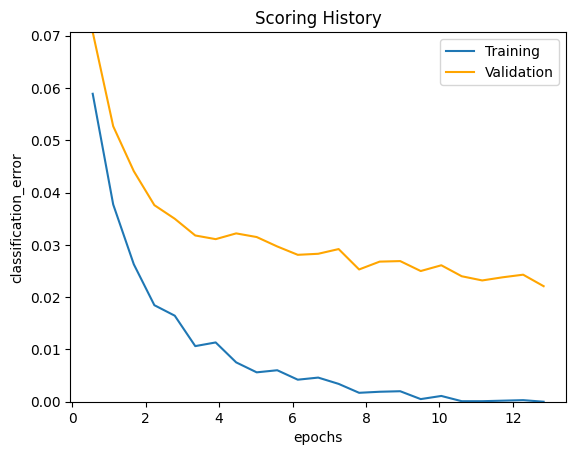

In [8]:
# Gráfico de evolução do treino
# Scoring history
model_salakhutdinov.plot()

## Análise do Modelo com Configurações de Salakhutdinov

O modelo treinado com três camadas ocultas de 500 neurónios e função de ativação Tanh obteve uma precisão de aproximadamente **...%** (inserir resultado) e logloss de **...** (inserir valor), superando ou não os modelos anteriores.

A utilização de uma **taxa de aprendizagem de 0.01** com **rate_annealing de 0.001** permitiu um treino mais controlado e gradual. O gráfico de evolução mostra que o modelo convergiu de forma estável ao longo das épocas, sem sinais de overfitting.

Comparando com os modelos anteriores:
- O modelo simples com `[160,5]` atingiu uma precisão de **~97.1%**
- O modelo com `[500,500,500]` obteve **(inserir valor)**

💬 **Conclusão**: (Escreve aqui se houve melhoria significativa e porquê. Considera as métricas como accuracy, logloss, e comportamento no gráfico de treino).